<a href="https://colab.research.google.com/github/KIRAN3031/Data-Analysis/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loading the Dataset

In [ ]:
# load Titanic dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# shape of the dataset
df.shape

(891, 15)

In [ ]:
# describing the data set
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the Dataset

In [ ]:
# Missing values analysis
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
missing = pd.DataFrame({'missing_count': df.isnull().sum(), 'missing_percent': (df.isnull().sum()/len(df))*100})

In [ ]:
missing.sort_values('missing_percent',ascending=False)

,missing_count,missing_percent
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
parch,0,0.000000
sibsp,0,0.000000
class,0,0.000000
fare,0,0.000000


In [ ]:
# Handling missing values

# fill the numeric missing values with mean
df['age'].fillna(df['age'].mean(),inplace=True)

# fill categorical missing values with mode
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

# fill deck column (too many missing values)
df.drop(columns= 'deck',inplace=True)

/tmp/ipython-input-1477701640.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)
/tmp/ipython-input-1477701640.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
print("The missing values after the cleaning of the data are ",df.isnull().sum())

The missing values after the cleaning of the data are  survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


# Handling Duplicates

In [58]:
print("Duplicate row : ",df.duplicated().sum() )

Duplicate row :  111


In [60]:
df['class']=df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embark_town']=df['embark_town'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    category
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


# Univariate Analysis : Numerical Data

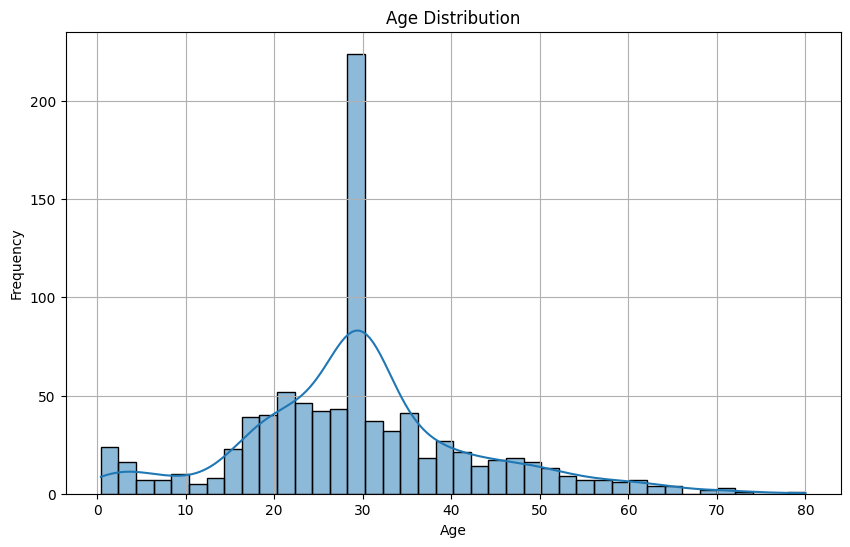

In [62]:
#univariate analysis
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe

# Histogram : Age
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins=40,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

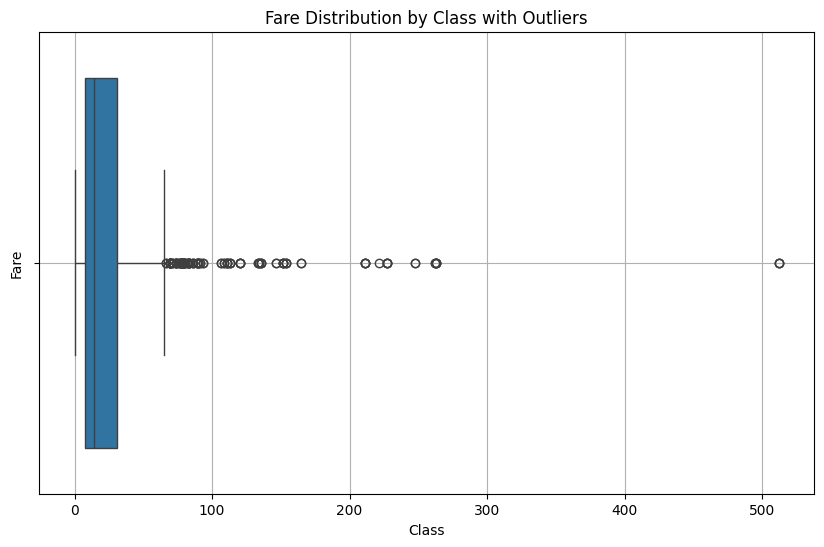

In [68]:
#  Box plot : Fare with different colours for the outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['fare'],data=df)
plt.title('Fare Distribution by Class with Outliers')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# Univariate Analysis : Categorical Data

In [69]:
cat_cols = df.select_dtypes(include=['category']).columns
df[cat_cols].describe()

,sex,class,embark_town
count,891,891,889
unique,2,3,3
top,male,Third,Southampton
freq,577,491,644


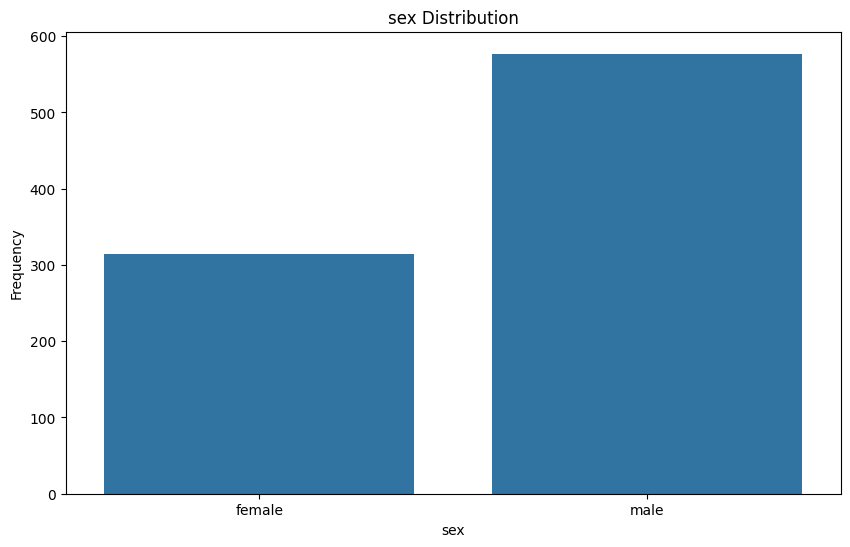

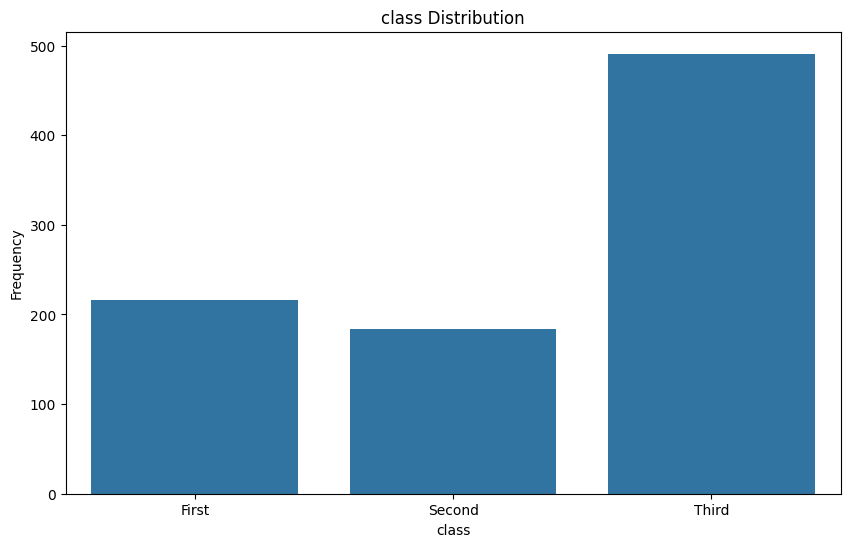

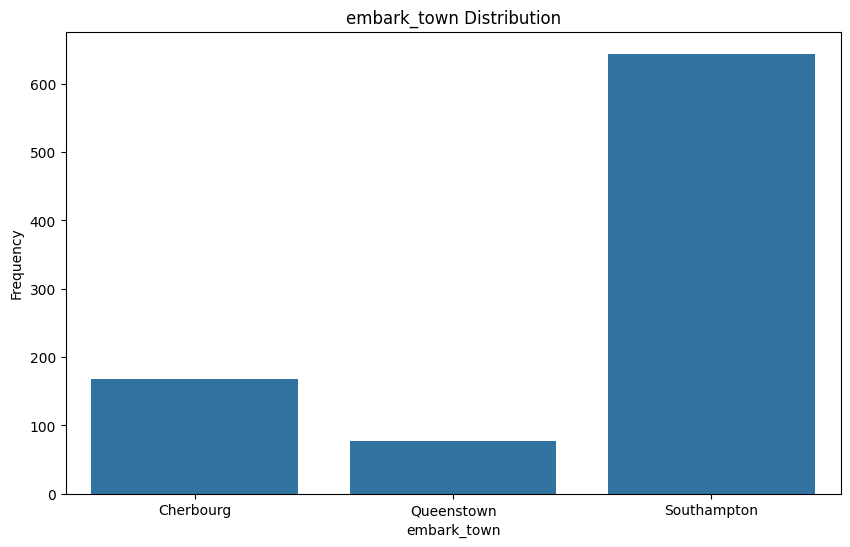

In [72]:
for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[col],data=df,)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate Analysis : Numerical vs Categorical


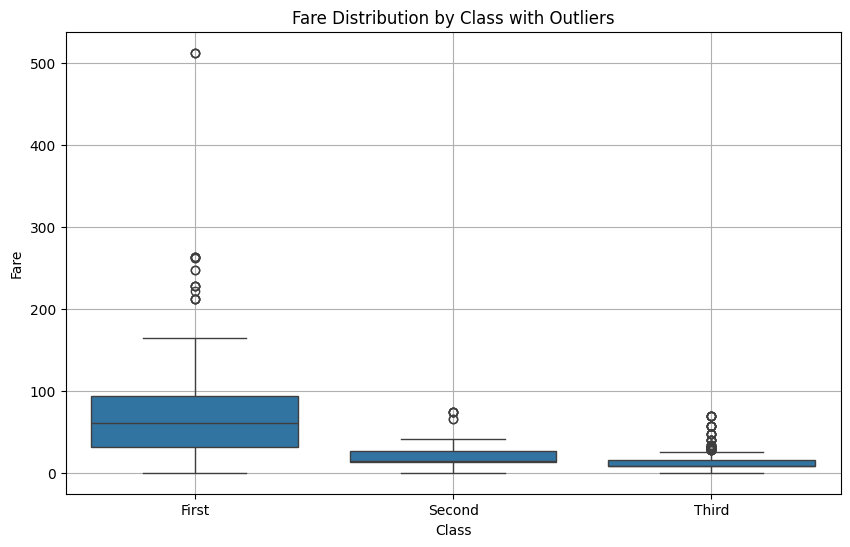

In [74]:
# bivariate analysis
plt.figure(figsize=(10,6))
sns.boxplot(x=df['class'],y=df['fare'],data=df)
plt.title('Fare Distribution by Class with Outliers')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# Bivariate Analysis : Categorical vs Categorical

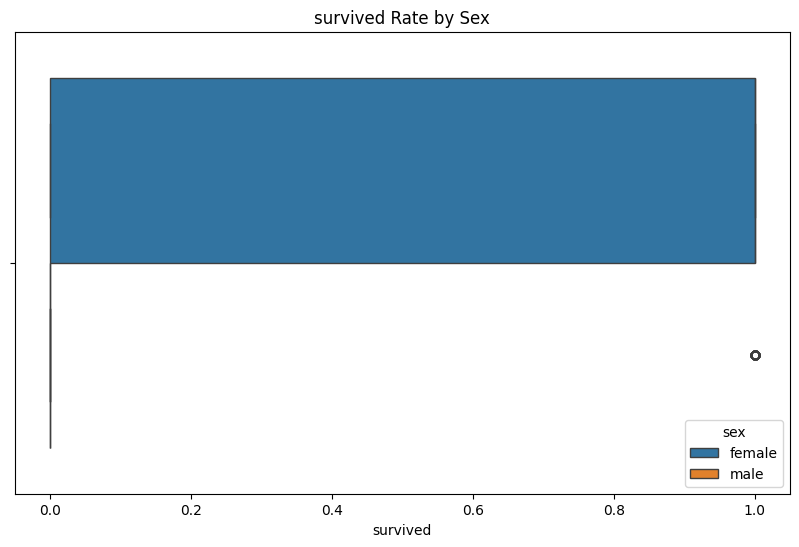

In [78]:
# bivariate Analysis : categorical vs Categorical
plt.figure(figsize=(10,6))
sns.boxplot(x='survived',hue='sex',data=df)
plt.title('survived Rate by Sex')
plt.show()

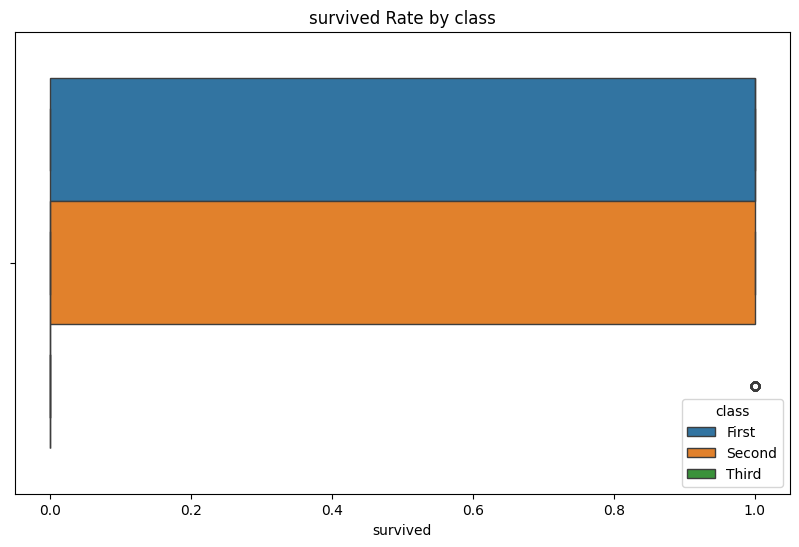

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(x='survived',hue='class',data=df)
plt.title('survived Rate by class')
plt.show()

# Correlation and multivariate analysis

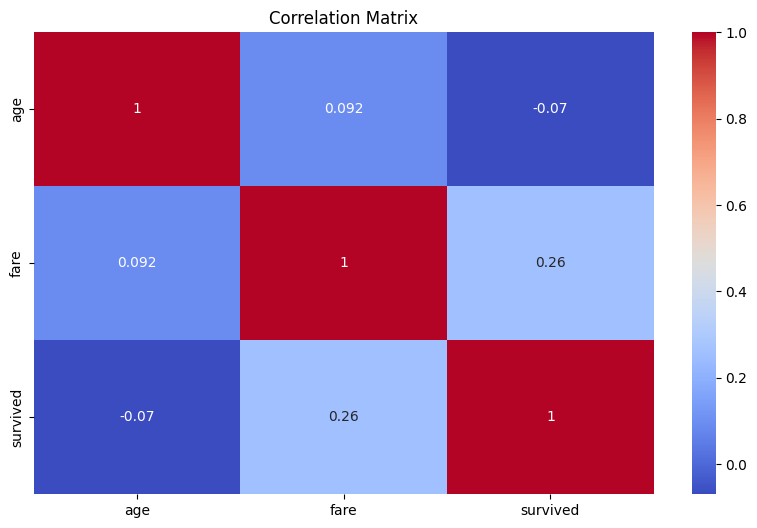

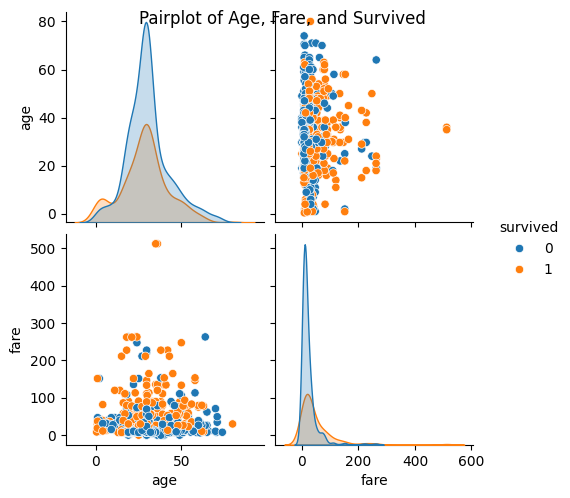

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['age','fare','survived']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print()
sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.suptitle('Pairplot of Age, Fare, and Survived')
plt.show()

# Outlier Detection

In [84]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [86]:
outliers = df[(df['fare']<lower_bound) | (df['fare']>upper_bound)]
print(f'Number of outliers in fare : {len(outliers)}')


Number of outliers in fare : 116


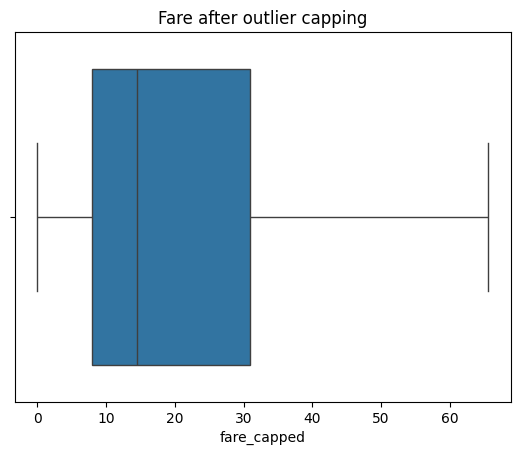

In [87]:
# Outliers
df['fare_capped'] = df['fare'].clip(lower_bound,upper_bound)
sns.boxplot(x=df['fare_capped'])
plt.title('Fare after outlier capping')
plt.show()